Model Accuracy: 100.00%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix (Raw):
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


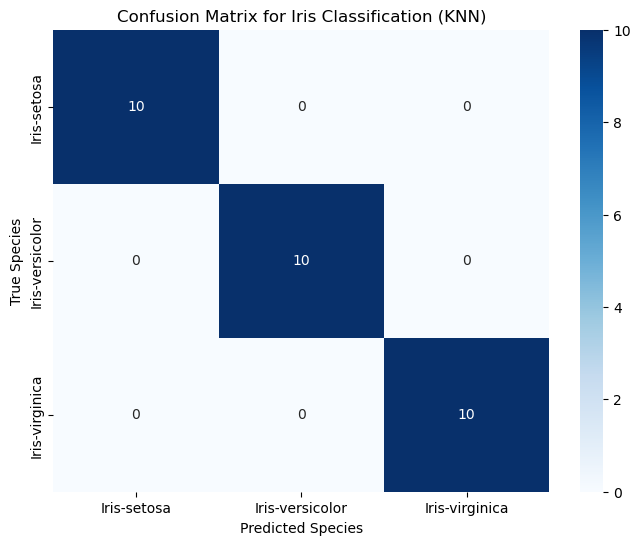

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Iris.csv")

# --- 2. Data Cleaning and Preprocessing ---

df = df.drop('Id', axis=1)

# --- 3. Prepare X (Features) and y (Target) ---
X = df.drop('Species', axis=1) 
y = df['Species']              

# --- 4. Split data into training and testing sets (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 5. Train a K-Nearest Neighbors (KNN) model ---

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# --- 6. Make predictions and Evaluate the model ---
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

# Generate Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Raw):\n", conf_matrix)

# Plot and save Confusion Matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=knn.classes_,
    yticklabels=knn.classes_,
)
plt.title('Confusion Matrix for Iris Classification (KNN)')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.savefig('knn_confusion_matrix.png')
plt.show() # Note: In a notebook, this displays the plot
